# Importing the libraries

In [2]:
%pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4835 sha256=3cb2e4a37624243c8fefe7f35219e9730262c76aaeb7aef8376f8c28f9f71b62
  Stored in directory: C:\Users\lance\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121936 sha256=f1536b568a9e97cd0e7dabf391177b0a6c2015bc231ddd1fc62093a944bdfbe6
  Stored in directory: C:\Users\lance\AppData\Local\pip\Cache\wheels\8e\28\49\fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
Successfully built termcolor absl-py
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0
Note: you may need to restart the kernel to use updated packages.


ERROR: mysql-connector-python 8.0.19 requires dnspython==1.16.0, which is not installed.
ERROR: mysql-connector-python 8.0.19 has requirement protobuf==3.6.1, but you'll have protobuf 3.12.2 which is incompatible.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

# Importing The Dataset

In [2]:
dataset = pd.read_csv("framingham.csv")

# Analysing The Data

In [ ]:
dataset.shape

(4238, 16)

In [ ]:
dataset.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
dataset.info

<bound method DataFrame.info of       male  age  education  ...  heartRate  glucose  TenYearCHD
0        1   39        4.0  ...       80.0     77.0           0
1        0   46        2.0  ...       95.0     76.0           0
2        1   48        1.0  ...       75.0     70.0           0
3        0   61        3.0  ...       65.0    103.0           1
4        0   46        3.0  ...       85.0     85.0           0
...    ...  ...        ...  ...        ...      ...         ...
4233     1   50        1.0  ...       66.0     86.0           1
4234     1   51        3.0  ...       65.0     68.0           0
4235     0   48        2.0  ...       84.0     86.0           0
4236     0   44        1.0  ...       86.0      NaN           0
4237     0   52        2.0  ...       80.0    107.0           0

[4238 rows x 16 columns]>

# Visualizing the data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


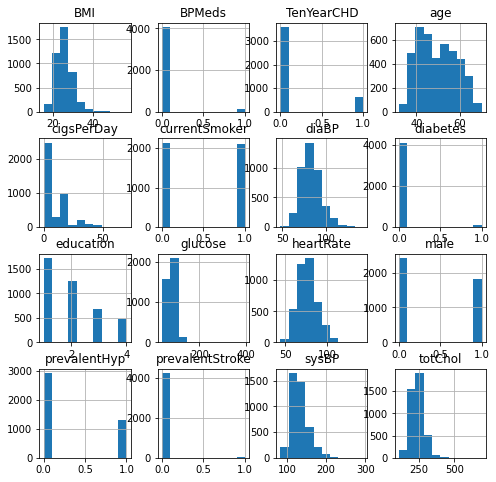

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

Text(0, 0.5, 'Frequency')

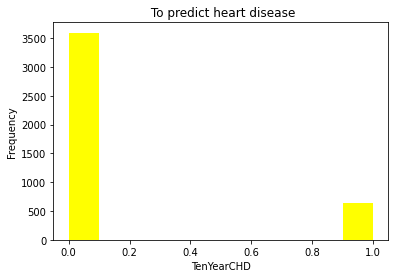

In [ ]:
fig, ax = plt.subplots()
ax.hist(dataset["TenYearCHD"],color = "yellow")
ax.set_title(' To predict heart disease')
ax.set_xlabel('TenYearCHD')
ax.set_ylabel('Frequency')

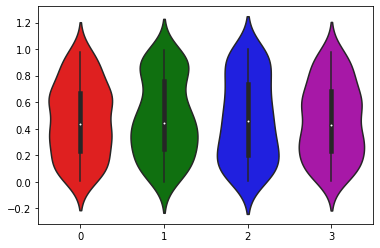

In [ ]:
data = np.random.random([100,4])
sns.violinplot(data=data, palette=['r','g','b','m'])

# Separating the dependent and independent variables

In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
np.isnan(X).sum()

645

In [ ]:
np.isnan(y).sum()

0

# Taking Care of Missing Values

In [4]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X = si.fit_transform(X)

In [ ]:
y.shape

(4238,)

In [ ]:
np.isnan(X).sum()

0

In [ ]:
np.isnan(y).sum()

0

In [ ]:
dataset.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Splitting into Training and test Data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# Normalising The data

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.13905392,  0.87110685, -0.96140402, ...,  3.03044173,
        -0.64339536,  0.5191961 ],
       [ 1.13905392, -1.23507731,  0.02239438, ...,  0.34734272,
        -1.1386557 ,  0.21363493],
       [ 1.13905392,  0.52007615,  0.02239438, ..., -0.53800618,
        -0.89102553,  0.38824131],
       ...,
       [ 1.13905392, -1.23507731,  1.00619279, ..., -0.33142477,
        -0.47830858, -0.04827465],
       [-0.87792156,  0.87110685, -0.96140402, ..., -0.38061082,
        -0.06559163, -0.04827465],
       [-0.87792156, -1.11806708,  0.02239438, ...,  0.18256945,
        -0.06559163, -0.39748742]])

In [ ]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
np.isnan(X_train).sum()

0

In [ ]:
np.isnan(y_train).sum()

0

# Preparing ANN Model with two layers

In [20]:
ann = tf.keras.models.Sequential()

In [21]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [22]:
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

In [23]:
ann.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))

In [24]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
model = ann.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size = 32,epochs=100)

Epoch 1/100
93/93 [==============================] - 1s 6ms/step - loss: 0.7939 - accuracy: 0.4343 - val_loss: 0.6824 - val_accuracy: 0.6533
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.6059 - accuracy: 0.7889 - val_loss: 0.5398 - val_accuracy: 0.8286
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4833 - accuracy: 0.8476 - val_loss: 0.4422 - val_accuracy: 0.8428
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4246 - accuracy: 0.8500 - val_loss: 0.4106 - val_accuracy: 0.8436
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4055 - accuracy: 0.8506 - val_loss: 0.4009 - val_accuracy: 0.8428
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3983 - accuracy: 0.8520 - val_loss: 0.3979 - val_accuracy: 0.8436
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3938 - accuracy: 0.8517 - val_loss: 0.3955 - val_accuracy: 0.8436
Epoch 8/100
9

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1059   15]
 [ 185   13]]


0.8427672955974843

# Model Accuracy Visualisation

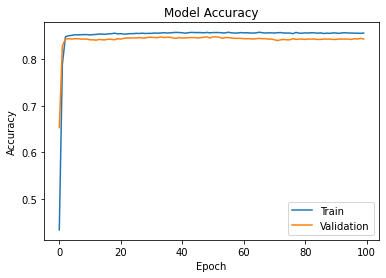

In [28]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Model Loss Visualisation

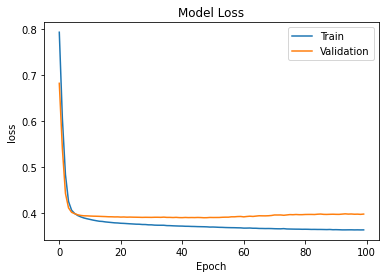

In [29]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Calculating Different Metrics

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1074
           1       0.46      0.07      0.12       198

    accuracy                           0.84      1272
   macro avg       0.66      0.53      0.51      1272
weighted avg       0.79      0.84      0.79      1272



# Using MLP Classifier for Prediction

In [32]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [33]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[969 105]
 [159  39]]


0.7924528301886793

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1074
           1       0.27      0.20      0.23       198

    accuracy                           0.79      1272
   macro avg       0.56      0.55      0.55      1272
weighted avg       0.77      0.79      0.78      1272



# Visualiaing The MLP Model After Apllying the PCA method

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


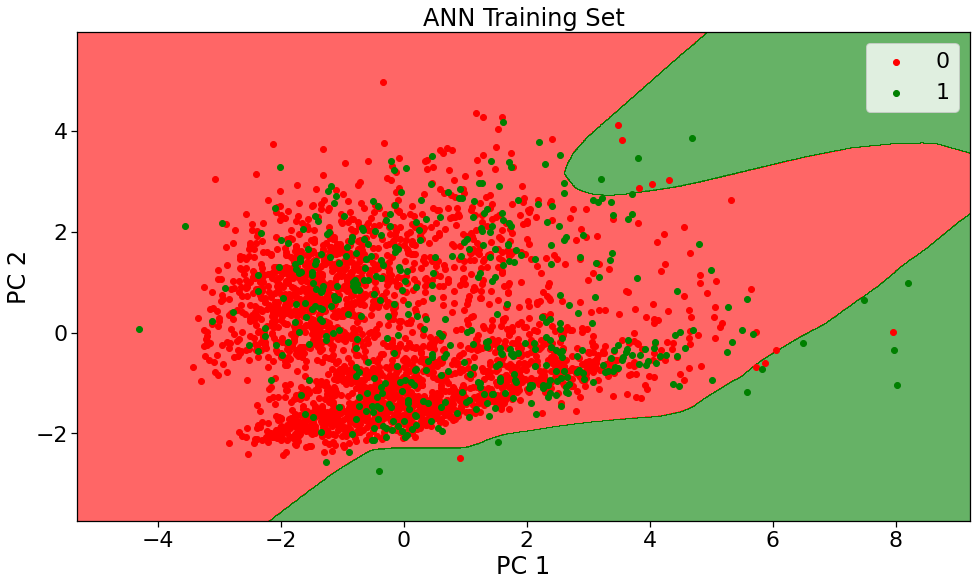

In [ ]:
visualization_train(model= 'ANN')

In [ ]:
import numpy
from matplotlib.colors import ListedColormap
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


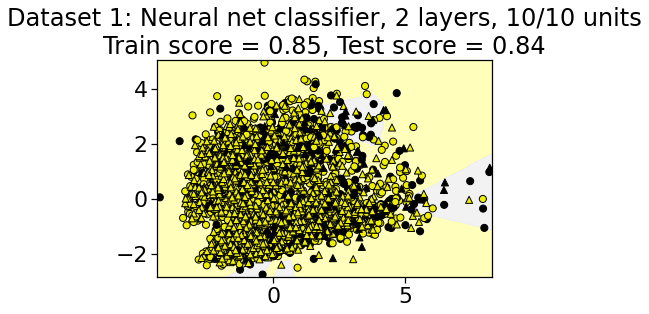

In [ ]:
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

# Saving a machine learning Model

In [ ]:
import joblib
joblib.dump(ann, 'ann_model.pkl') 
joblib.dump(sc, 'sc_model.pkl') 

In [ ]:
knn_from_joblib = joblib.load('mlp_model.pkl') 
sc_model = joblib.load('sc_model.pkl') 

# Saving a tensorflow model

In [ ]:
!pip install h5py

In [ ]:
ann.save('ann_model.h5')

In [ ]:
model = tf.keras.models.load_model('ann_model.h5')